# A little brief tutorial on Hilbert Transform
This notebook presents a short explanation on Hilbert Transform, and how to use Python with SciPy to see HT in action.

**Hilbert Transform** is simply a convolution of any function $f(t)$ with $1\frac{\pi}{t}$ [1], i.e.:

$$ H(f(t)) = \dfrac{1}{\pi t} \ast f(t)  $$


As we know, a convolution is an "integration" operation, so this function can be written as:


$$ H(f(t)) =  \dfrac{1}{\pi} PV \int_{-\infty}^{\infty} \dfrac{f(s)}{t-s} ds $$
Where PV is te "Cauchy Principal Value of the Integral"

Here we are not going explain the details of this integral, but there is one important idiossincrasy that requires a special attention: the **singularity** at $s=t$.  Please refer to the [4] and mostly recommended [5] for more details on the Hilbert Transform.


In order to see **Hilbert TRansform in action**, let's first import the relevant libraries (scipy and numpy).

From scipy.signal, we are going to use the **"scipy.signal.hilbert(...)"** function.

Let's start importing libraries and setting variables.

In [72]:
import numpy as np
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


We will simulate an ECG, however we will use a regular sin wave only. 

Of course the waveform is far from a real ECG, but at least we can set the frequency and try to capture that with the Hilbert Transform.

Please note the BPM variable below. We can play with it to see HT capturing the diferent frequencies.

In [59]:
duration = 10. # seconds
fs = 30.
samples = int(fs*duration)
BPM = 70
BPS = BPM/60.
W = (2*np.pi)* BPS  #Beats per second in radians/s

print "We will try to capture {0} BPM (or {1} BPS).".format(BPM, BPS)

We will try to capture 70 BPM (or 1.16666666667 BPS).


Here we will create the waveforms.

The function $f(t)=sin(t)$ will be our target waveform, but we also created $g(t)=-cos(t)$ (which is the exact Hilbert Transform of $f(t)$), just to see how the numerical computation approximates the exact solution.

In [60]:
t = np.linspace(0, duration, samples)
f = np.sin(W*t)
g = - np.cos(W*t)

analyticalSignal = scipy.signal.hilbert(f)

The _**scipy.signal.hilbert(...)**_ function, in fact, returns the **"Analytic Signal"**, which is the analytical representation of the original (real valued) function.

$$ f_{analytical}(t) = f(t) + j*H(f(t))$$

The actual Hilbert Transform of the signal is the imaginary part of the analytical signal, therefore:

In [61]:
H = np.imag(analyticalSignal)

## Charts

Let's plot the results and check how our wave look like:

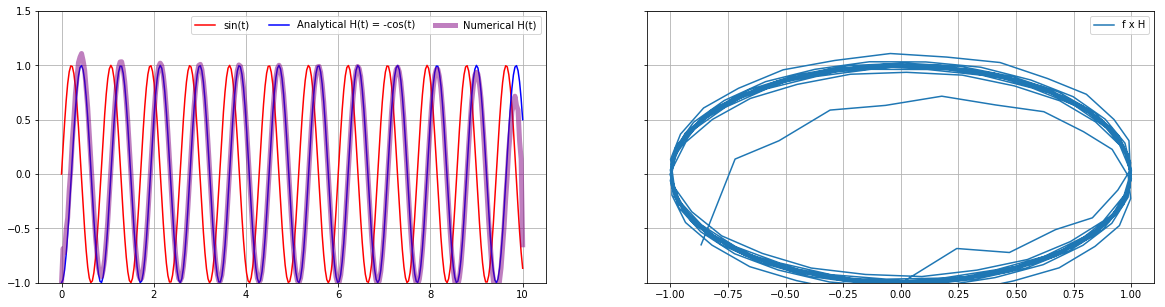

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5), sharey=True)
ax1.plot(t,f, color="red", label="sin(t)")
ax1.plot(t,g, color="blue", label="Analytical H(t) = -cos(t)")
ax1.plot(t,H, color="purple", label="Numerical H(t)", lw=5, alpha=.5)

ax1.legend(fontsize=10, loc=1, ncol=3)
ax1.set_ylim(-1,1.5)
ax1.grid()


ax2.plot(f,H, label="f x H")
ax2.legend()
ax2.grid()
plt.show()

The second chart above is the plot of $ f(t) x H(f(t)) $.

Can we count how many cycles? (maybe it is BPM/60 * 10 seconds ?

## Instantaneous angles (phase)

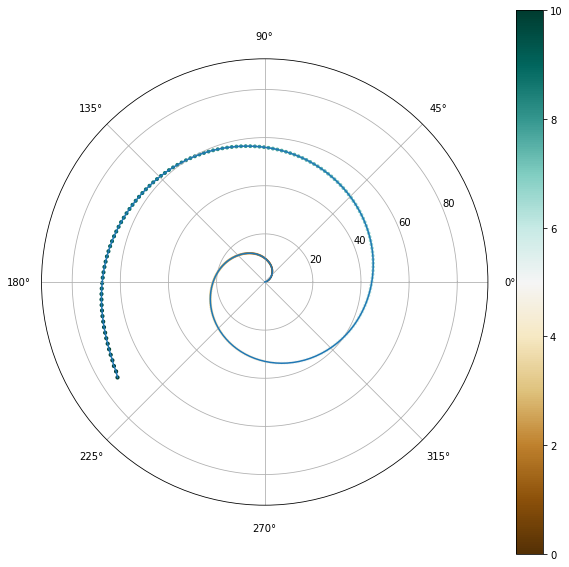

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
phases = np.unwrap(np.angle(analyticalSignal))

plt.figure(figsize=(10,10))
plt.subplot(polar=True)
plt.scatter(t,phases, c=t, s=t, cmap=cm.BrBG, alpha=1)
plt.plot(t, phases)
plt.colorbar()
plt.show()

## Instantaneous Frequencies

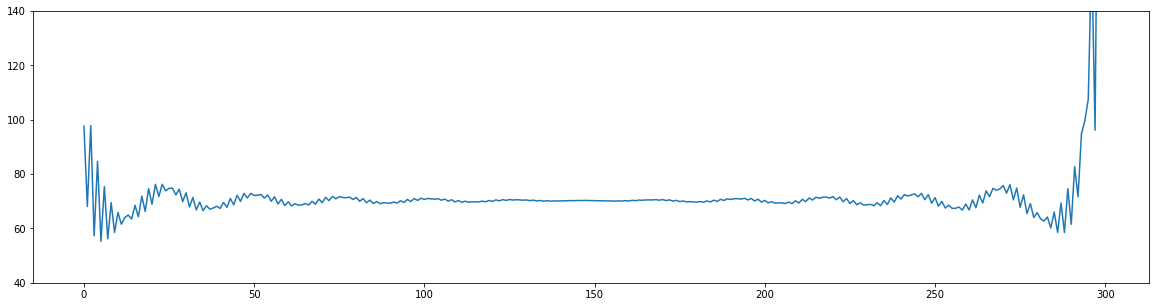

Average :  71.3531189261
Middle  :  70.2658796462


In [64]:
freqs =  np.diff(phases) / (2.0*np.pi) * fs
plt.figure(figsize=(20,5))
plt.plot(freqs*60)
plt.ylim(40,140)
plt.show()

print "Average : ", np.mean(freqs)*60
print "Middle  : ", freqs[len(freqs)/2]*60

## Error in the estimation as function of duration

It seems intuitive that the error in estimation can be 

In [94]:
results = []
for duration in np.linspace(start=1, stop=60, num=60):
    fs = 30.
    samples = int(fs*duration)
    BPM = 70
    BPS = BPM/60.    
    W = (2*np.pi)* BPS  #Beats per second in radians/s
    
    t = np.linspace(0, duration, samples)
    f = np.sin(W*t)
    analyticalSignal = scipy.signal.hilbert(f)
    phases = np.unwrap(np.angle(analyticalSignal))
    freqs =  np.diff(phases) / (2.0*np.pi) * fs    
    
    
    average = np.mean(freqs)*60
    middle = freqs[len(freqs)/2]*60
    errorAvg = BPM - average
    errorMiddle = BPM - middle
    results.append([duration, average, middle, errorAvg, errorMiddle])
    
#     print "Average : ", average
#     print "Middle  : ", middle
#     print "ErrorAvg  : ", errorAvg
#     print "ErrorMiddle  : ", errorMiddle
#     print "#"*40
    
results = pd.DataFrame(data=results, columns=["duration", "average","middle", "errorAvg", "errorMiddle"])
results[0:10]

,duration,average,middle,errorAvg,errorMiddle
0,1.0,46.755138,70.431127,23.244862,-0.431127
1,2.0,55.960661,70.321953,14.039339,-0.321953
2,3.0,70.786517,71.657084,-0.786517,-1.657084
3,4.0,73.397469,70.393041,-3.397469,-0.393041
4,5.0,71.241946,70.406605,-1.241946,-0.406605
5,6.0,70.391061,70.364190,-0.391061,-0.364190
6,7.0,66.752972,70.385142,3.247028,-0.385142
7,8.0,66.531491,70.349920,3.468509,-0.349920
8,9.0,70.260223,70.159729,-0.260223,-0.159729
9,10.0,71.353119,70.265880,-1.353119,-0.265880


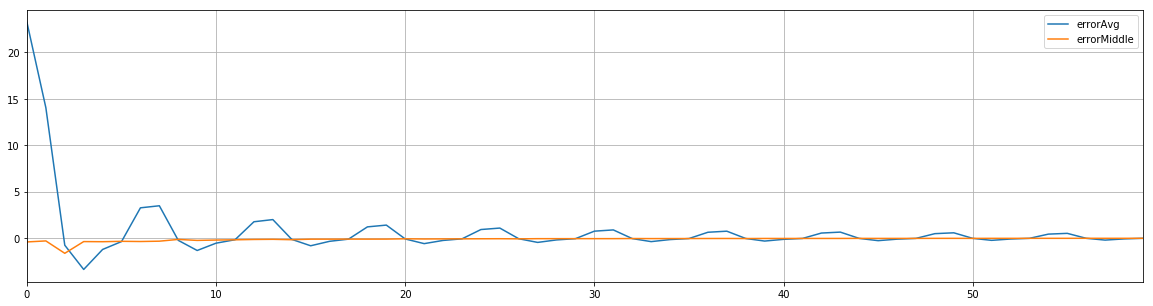

In [93]:
fig, ax = plt.subplots(1,figsize=(20,5), sharey=True)
results[["errorAvg","errorMiddle"]].plot(ax=ax)
plt.grid()
plt.show()

## References


[1] Analytical Signal (Wikipedia), URL: https://en.wikipedia.org/wiki/Analytic_signal

[2] Hilbert Trasnform (Wikipedia), URL:  https://en.wikipedia.org/wiki/Hilbert_transform 

[3] Convolution (Wikipedia), URL: https://en.wikipedia.org/wiki/Convolution

[4] Tolwinski, Susan. **"The Hilbert transform and empirical mode decomposition as tools for data analysis."** Tucson: University of Arizona (2007).

[5] Klingspor, Måns. **"Hilbert transform: Mathematical theory and applications to signal processing."**, PhD Thesis, 2015.